<a href="https://colab.research.google.com/github/kaushik3012/3d-pose-warping/blob/master/3DPoseWarping_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Setup

In [ ]:
# Change to Tensorflow 1.x
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# Load the Tensorboard notebook Extension
%load_ext tensorboard

In [ ]:
# Clone from our project Repository
!git clone https://github.com/kaushik3012/3d-pose-warping.git

Cloning into '3d-pose-warping'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 235 (delta 80), reused 53 (delta 53), pack-reused 124
Receiving objects: 100% (235/235), 22.42 MiB | 28.84 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# mount Google Drive, if needed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change this variable to where the prerequisites are located
source_dir = '/content/drive/MyDrive/deepfashion'

# Directory must be like this (img.zip, checkpoint.zip, fash-3d_w-3d_p.zip - all in one folder):
#--\{deepfashion}
#       |--{img.zip}
#       |--{checkpoint.zip}
#       |--{fash-3d_w-3d_p.zip}  <--needed only if pretrained model is to be used

In [ ]:
#unzip the dataset in gdrive to local machine
!unzip $source_dir/img.zip -d /content/3d-pose-warping/data/fashion3d

Streaming output truncated to the last 5000 lines.
   creating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005020/
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005020/06_1_front.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005020/06_2_side.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005020/06_3_back.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005020/06_7_additional.jpg  
   creating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005033/
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005033/03_1_front.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005033/03_2_side.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/img/WOMEN/Tees_Tanks/id_00005033/03_3_back.jpg  
  inflating: /content/3d-pose-warping/data/fashion3d/

In [ ]:
# Changing the folder name to images
!mv /content/3d-pose-warping/data/fashion3d/img /content/3d-pose-warping/data/fashion3d/images

mv: cannot stat '/content/3d-pose-warping/data/fashion3d/img': No such file or directory


In [ ]:
# Copy the pretrained checkpoint for pose estimator to our project
!mkdir /content/3d-pose-warping/pose3d_minimal/checkpoint
!unzip $source_dir/checkpoint.zip -d /content/3d-pose-warping/pose3d_minimal/checkpoint

Archive:  /content/drive/MyDrive/deepfashion/checkpoint.zip
  inflating: /content/3d-pose-warping/pose3d_minimal/checkpoint/model.ckpt-160684.data-00000-of-00001  
  inflating: /content/3d-pose-warping/pose3d_minimal/checkpoint/model.ckpt-160684.index  
  inflating: /content/3d-pose-warping/pose3d_minimal/checkpoint/model.ckpt-160684.meta  


In [ ]:
%cd 3d-pose-warping

/content/3d-pose-warping


Copying the Trained Model into our project

In [ ]:
!mkdir checkpoints
!unzip $source_dir/fash-3d_w-3d_p.zip -d checkpoints/fash-3d_w-3d_p

Archive:  /content/drive/MyDrive/deepfashion/fash-3d_w-3d_p.zip
  inflating: checkpoints/fash-3d_w-3d_p/checkpoint  
  inflating: checkpoints/fash-3d_w-3d_p/model.ckpt-149999.data-00000-of-00001  
  inflating: checkpoints/fash-3d_w-3d_p/model.ckpt-149999.index  
  inflating: checkpoints/fash-3d_w-3d_p/model.ckpt-149999.meta  


In [ ]:
# Checking the checkpoint directory
!ls checkpoints/fash-3d_w-3d_p

checkpoint			       model.ckpt-149999.index
model.ckpt-149999.data-00000-of-00001  model.ckpt-149999.meta


#Testing our Trained Model

In [ ]:
# Run the Test file
!python3 test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Hyperparams:
data_dir:	data
tb_dir:	tensorboard_events/fash-3d_w-3d_p/
check_dir:	checkpoints/fash-3d_w-3d_p/
batch_size:	2
batches:	150000
dataset:	fashion3d
image_size:	256
volume_size:	64
data_workers:	7
augment_color:	True
augment_transform:	True
before_count:	3
after_count:	3
residual_channels:	64
depth:	32
alpha:	0.0002
beta1:	0.5
beta2:	0.999
feature_loss_weight:	3.0
steps_per_checkpoint:	1000
steps_per_validation:	1000
steps_per_scalar_summary:	20
steps_per_image_summary:	200
with_valid:	True
valid_count:	256
test_count:	2
name:	fash-3d_w-3d_p
profile:	-1


2021-08-02 17:02:04.998303: I tensorflow/core/platform/profile_

In [ ]:
import cv2
res = cv2.imread('/content/3d-pose-warping/output/res.png')
res_with_mask = cv2.imread('/content/3d-pose-warping/output/res_with_mask.png')

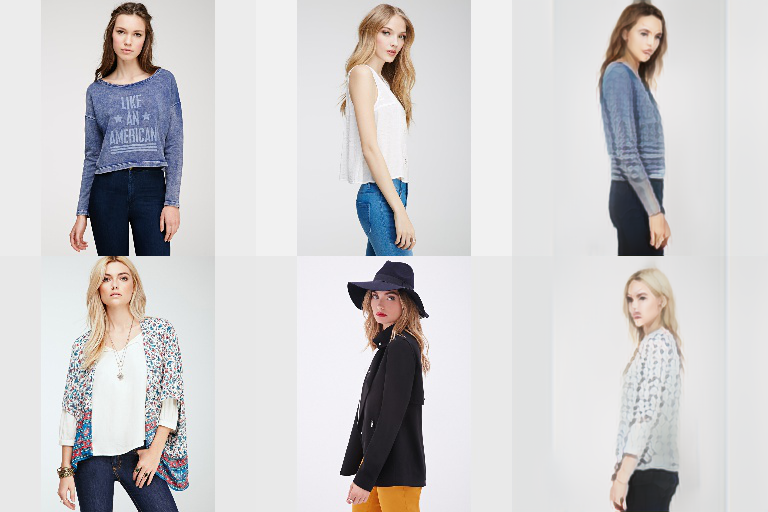

In [ ]:
cv2_imshow(res)

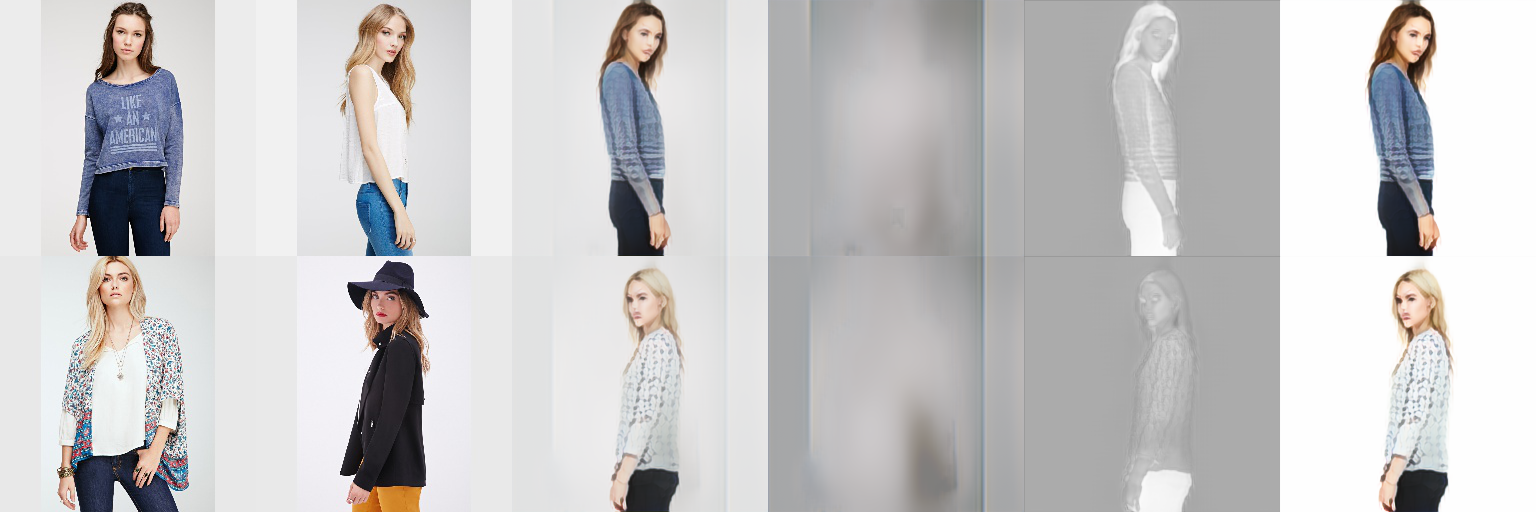

In [ ]:
cv2_imshow(res_with_mask)

In [ ]:
#Test using images of same person
!python3 test.py profile 0

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Hyperparams:
data_dir:	data
tb_dir:	tensorboard_events/fash-3d_w-3d_p/
check_dir:	checkpoints/fash-3d_w-3d_p/
batch_size:	2
batches:	150000
dataset:	fashion3d
image_size:	256
volume_size:	64
data_workers:	7
augment_color:	True
augment_transform:	True
before_count:	3
after_count:	3
residual_channels:	64
depth:	32
alpha:	0.0002
beta1:	0.5
beta2:	0.999
feature_loss_weight:	3.0
steps_per_checkpoint:	1000
steps_per_validation:	1000
steps_per_scalar_summary:	20
steps_per_image_summary:	200
with_valid:	True
valid_count:	256
test_count:	2
name:	fash-3d_w-3d_p
profile:	0


2021-08-02 17:03:58.474692: I tensorflow/core/platform/profile_u

In [ ]:
res = cv2.imread('/content/3d-pose-warping/output/res.png')
res_with_mask = cv2.imread('/content/3d-pose-warping/output/res_with_mask.png')

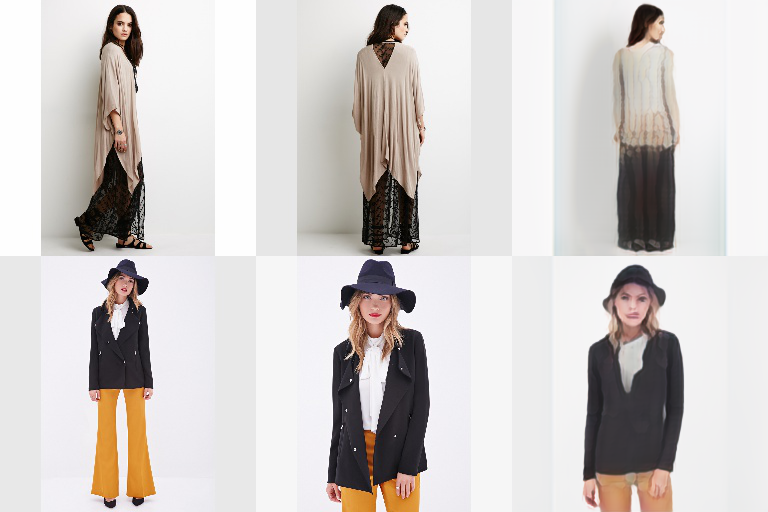

In [ ]:
cv2_imshow(res)

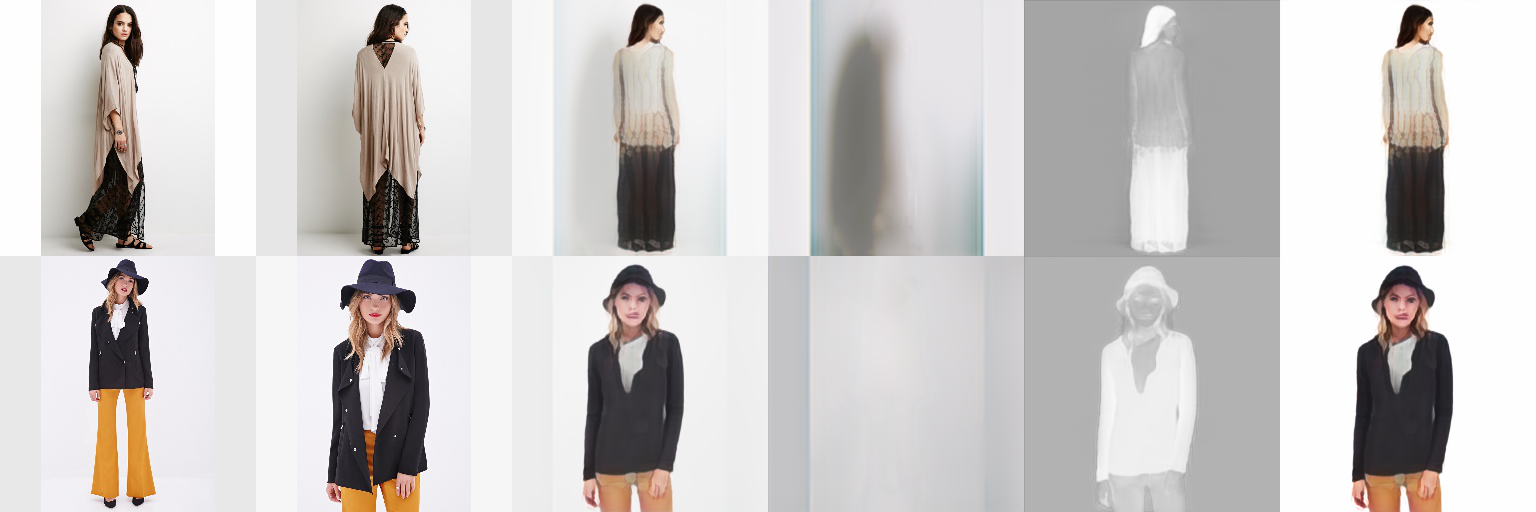

In [ ]:
cv2_imshow(res_with_mask)

Visualising Results using TensorBoard

In [ ]:
# Load TensorBoard Events from TB directory
from parameters import params
tb_dir = params['tb_dir']
%tensorboard --logdir $tb_dir